In [1]:
import numpy as np
from quanfima import simulation
import pyvista as pv

CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.


In [2]:
result = simulation.simulate_fibers((128,128,128), 
                                    n_fibers=60, 
                                    max_fails=200,
                                    radius_lim=(2, 3), 
                                    gap_lim=(3,5))

In [3]:
# unpacking result
volume = result[0]
lat_ref = result[1]
azth_ref = result[2]
diameter = result[3]
n_generated = result[4]

In [11]:
def plot_3D(volume, 
            cmap = 'jet',
            size = None,
            file= None):
    
    p = pv.Plotter(shape=(1, 1),window_size=size)
    
    opacity = np.ones(int(volume.max()))
    opacity[0] = 0
    p.add_volume(volume, 
                 opacity = opacity, 
                 cmap = cmap,
                 show_scalar_bar=False, 
                 clim = [0, int(volume.max())]
                 )
    p.view_isometric()
    p.add_axes()
    p.set_background('white')
    p.add_scalar_bar(color='black', )
    if file:
        p.show(screenshot=file)
    else: 
        p.show()

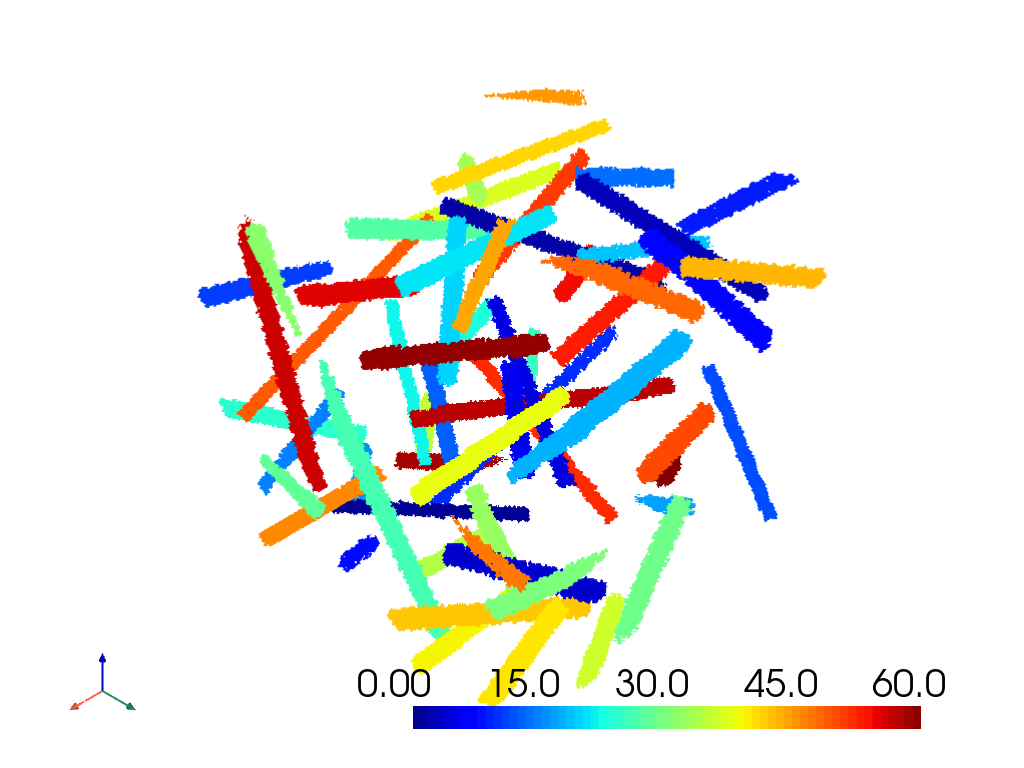

In [12]:
plot_3D(volume)